In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/Users/fangcheng/sklearn/项目六：温度预测/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2019,1,1,Fri,45,45,45.6,45,29
1,2019,1,2,Sat,44,45,45.7,44,61
2,2019,1,3,Sun,45,44,45.8,41,56
3,2019,1,4,Mon,44,41,45.9,40,53
4,2019,1,5,Tues,41,40,46.0,44,41


### 特征说明

year：年份
month：月份
day：天
temp_2：前天的最高温度
temp_1：昨天的最高温度
average：在历史中，每年这天的平均最高温度
actual：实际温度

In [6]:
# 数据规模
df.shape

(348, 9)

In [7]:
# 数据集的基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     348 non-null    int64  
 1   month    348 non-null    int64  
 2   day      348 non-null    int64  
 3   week     348 non-null    object 
 4   temp_2   348 non-null    int64  
 5   temp_1   348 non-null    int64  
 6   average  348 non-null    float64
 7   actual   348 non-null    int64  
 8   friend   348 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 24.6+ KB


In [9]:
# 数据集的统计特征
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,348.0,2019.000000,0.000000,2019.0,2019.000,2019.0,2019.000,2019.0
month,348.0,6.477011,3.498380,1.0,3.000,6.0,10.000,12.0
day,348.0,15.514368,8.772982,1.0,8.000,15.0,23.000,31.0
temp_2,348.0,62.652299,12.165398,35.0,54.000,62.5,71.000,117.0
temp_1,348.0,62.701149,12.120542,35.0,54.000,62.5,71.000,117.0
average,348.0,59.760632,10.527306,45.1,49.975,58.2,69.025,77.4
actual,348.0,62.543103,11.794146,35.0,54.000,62.5,71.000,92.0
friend,348.0,60.034483,15.626179,28.0,47.750,60.0,71.000,95.0


In [10]:
# 时间特征预处理

import datetime

years = df['year']
months = df['month']
days = df['day']

#datetime格式
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year,month,day in zip(years,months,days)]

dates = [datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]
dates[:5]

[datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 2, 0, 0),
 datetime.datetime(2019, 1, 3, 0, 0),
 datetime.datetime(2019, 1, 4, 0, 0),
 datetime.datetime(2019, 1, 5, 0, 0)]

In [11]:
# one_hot_encoding
df = pd.get_dummies(df)
df.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2019,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2019,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2019,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2019,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2019,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


总体来说，该数据集比较干净。其数据预处理工作进行了两项任务，时间（日期）数据的标准化处理，对类别数据进行了one_hot_encoding编码。

### 特征展示

In [12]:
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'Friend estimate Temp')

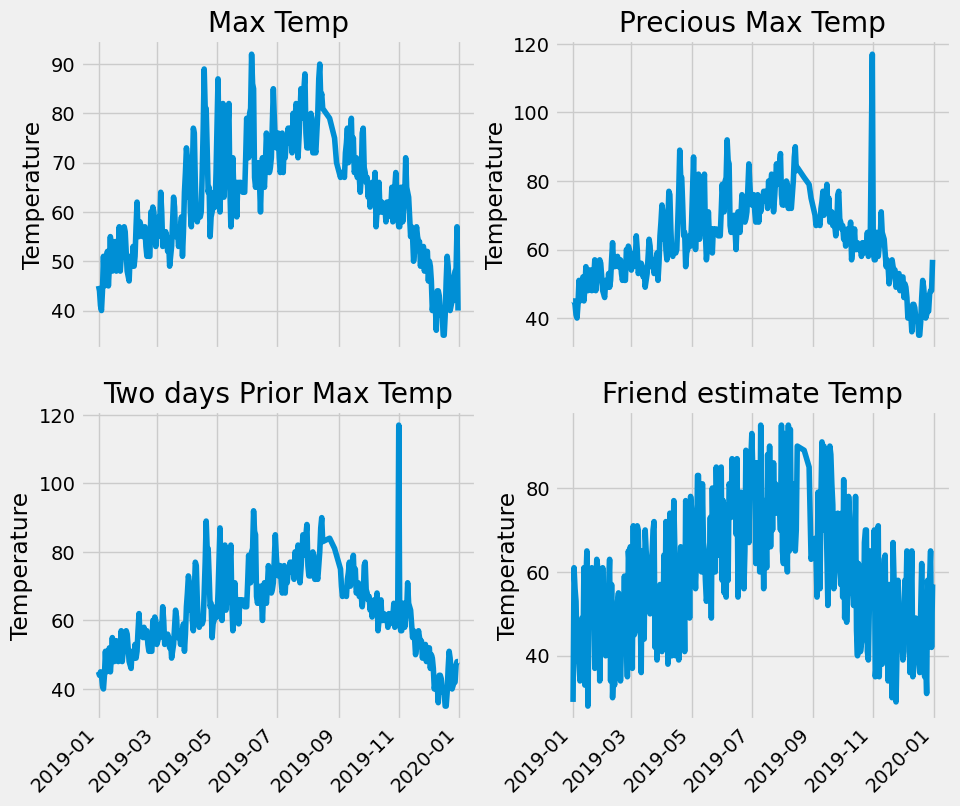

In [18]:
# 展示4个特征，temp_1,temp_2,actual,friend
# 设置绘图
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
fig.autofmt_xdate(rotation=45)

# 标签值
ax1.plot(dates,df['actual'])
ax1.set_xlabel('');ax1.set_ylabel('Temperature');ax1.set_title('Max Temp')

# 昨天的温度
ax2.plot(dates,df['temp_1'])
ax2.set_xlabel('');ax2.set_ylabel('Temperature');ax2.set_title('Precious Max Temp')

# 前天的温度
ax3.plot(dates,df['temp_2'])
ax3.set_xlabel('');ax3.set_ylabel('Temperature');ax3.set_title('Two days Prior Max Temp')

# 朋友猜测的温度
ax4.plot(dates,df['friend'])
ax4.set_xlabel('');ax4.set_ylabel('Temperature');ax4.set_title('Friend estimate Temp')

In [19]:
# 切分数据集
labels = df['actual']
labels = np.array(labels)

features = df.drop('actual',axis=1)

feature_list = list(features.columns)
features = np.array(features)

In [20]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels = train_test_split(features,labels,test_size=0.25,random_state=0)

print('训练特征:',train_features.shape)
print('训练标签:',train_labels.shape)
print('测试特征:',test_features.shape)
print('测试标签:',test_labels.shape)

训练特征: (261, 14)
训练标签: (261,)
测试特征: (87, 14)
测试标签: (87,)


### 建立随机森林模型

In [22]:
from sklearn.ensemble import RandomForestRegressor

# 先建立1000颗数的RF模型
RF = RandomForestRegressor(n_estimators=1000,random_state=0)
RF.fit(train_features,train_labels)
predictions = RF.predict(test_features)

# 评价指标MSE
from sklearn.metrics import mean_squared_error
result = mean_squared_error(test_labels,predictions)
RMSE = np.sqrt(result)
print('预测结果的误差：',RMSE)

预测结果的误差： 4.920500212867345


In [39]:
#限制下树模型

small_RF = RandomForestRegressor(n_estimators = 10,max_depth = 3,random_state = 0)
small_RF.fit(train_features,train_labels)

tree2 = small_RF.estimators_[4]

### 特征的重要性

In [40]:
RF.feature_importances_

array([0.        , 0.01158321, 0.01992458, 0.02252196, 0.51509262,
       0.39039262, 0.02137749, 0.00219475, 0.00632912, 0.00217622,
       0.00229097, 0.0014988 , 0.00197692, 0.00264074])

In [41]:
importances = list(RF.feature_importances_)
feature_importances = [(features,round(importances,2)) for feature,importances in zip(feature_list,importances)]

feature_importances = sorted(feature_importances,key = lambda x:x[1],reverse=True)

In [42]:
feature_importances[:5]

[(array([[2.019e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
          0.000e+00],
         [2.019e+03, 1.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
          0.000e+00],
         [2.019e+03, 1.000e+00, 3.000e+00, ..., 0.000e+00, 0.000e+00,
          0.000e+00],
         ...,
         [2.019e+03, 1.200e+01, 2.900e+01, ..., 1.000e+00, 0.000e+00,
          0.000e+00],
         [2.019e+03, 1.200e+01, 3.000e+01, ..., 0.000e+00, 0.000e+00,
          0.000e+00],
         [2.019e+03, 1.200e+01, 3.100e+01, ..., 0.000e+00, 0.000e+00,
          0.000e+00]]),
  0.52),
 (array([[2.019e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
          0.000e+00],
         [2.019e+03, 1.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
          0.000e+00],
         [2.019e+03, 1.000e+00, 3.000e+00, ..., 0.000e+00, 0.000e+00,
          0.000e+00],
         ...,
         [2.019e+03, 1.200e+01, 2.900e+01, ..., 1.000e+00, 0.000e+00,
          0.000e+00],
         [2.019e+03, 1.200e+01, 3.000e+01

In [35]:
[print('Variable:{:20} Importance :{}'.format(*pair)) for pair in feature_importances]

TypeError: unsupported format string passed to numpy.ndarray.__format__

Text(0.5, 1.0, 'Variable Importances')

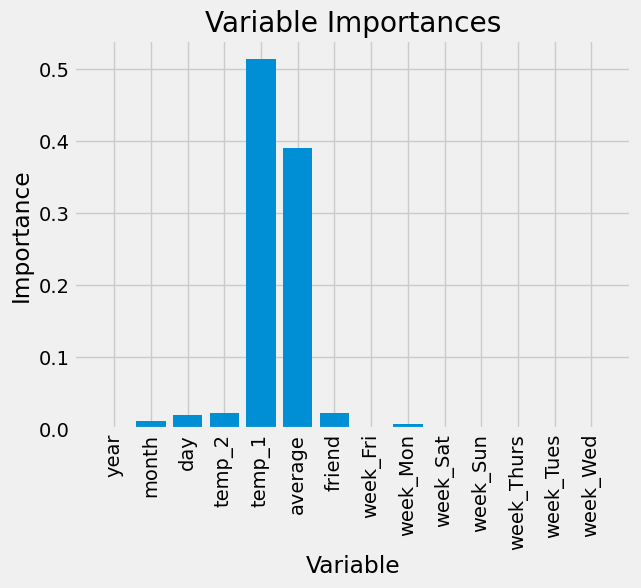

In [36]:
x_values = list(range(len(importances)))
#绘图
plt.bar(x_values,importances)
plt.xticks(x_values,feature_list,rotation = 90)
plt.xlabel('Variable');plt.ylabel('Importance');plt.title('Variable Importances')

In [43]:
RF_most_important = RandomForestRegressor(n_estimators = 1000,random_state = 0)

#选取两个最重要的特征
important_indices = [feature_list.index('temp_1'),feature_list.index('average')]

RF_most_important.fit(train_features[:,important_indices],train_labels)
predictions = RF_most_important.predict(test_features[:,important_indices])

In [44]:
# 预测结果

RMSE = np.sqrt(mean_squared_error(predictions,test_labels))
RMSE

5.115832593627256

### 从均方误差来看，其值没有下降，反而上升了，说明其他特征还是有价值的，不能只凭特征的重要性就否定部分特征数据，一切都需要试验验证。

In [45]:
#对比真实数据与预测数据

years = features[:,feature_list.index('year')]
months = features[:,feature_list.index('month')]
days = features[:,feature_list.index('day')]
dates = [str(int(year)) + '-' + str(int(month)) +'-'+ str(int(day)) for year,month,day in zip(years,months,days)]
dates = [datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]
#创建一个表格，用于保存日期和真实值
true_data = pd.DataFrame(data = {'date':dates,'actual':labels})

#创建一个表格，用于保存预测值
test_years = test_features[:,feature_list.index('year')]
test_months = test_features[:,feature_list.index('month')]
test_days = test_features[:,feature_list.index('day')]
test_dates = [str(int(year)) + '-' + str(int(month)) +'-'+ str(int(day)) for year,month,day in zip(test_years,test_months,test_days)]
test_dates = [datetime.datetime.strptime(date,'%Y-%m-%d') for date in test_dates]

#创建随机森林模型
RF = RandomForestRegressor(n_estimators = 1000,random_state = 0)
RF.fit(train_features,train_labels)
predictions = RF.predict(test_features)

test_temp = pd.DataFrame(data = {'test_date':test_dates,'pred_temp':predictions})

In [46]:
true_data.iloc[:5]

,date,actual
0,2019-01-01,45
1,2019-01-02,44
2,2019-01-03,41
3,2019-01-04,40
4,2019-01-05,44


In [47]:
test_temp.iloc[:5]

,test_date,pred_temp
0,2019-01-07,48.514
1,2019-02-24,57.880
2,2019-10-13,62.513
3,2019-02-17,54.867
4,2019-11-08,61.837


Text(0.5, 1.0, 'Temp changes with date')

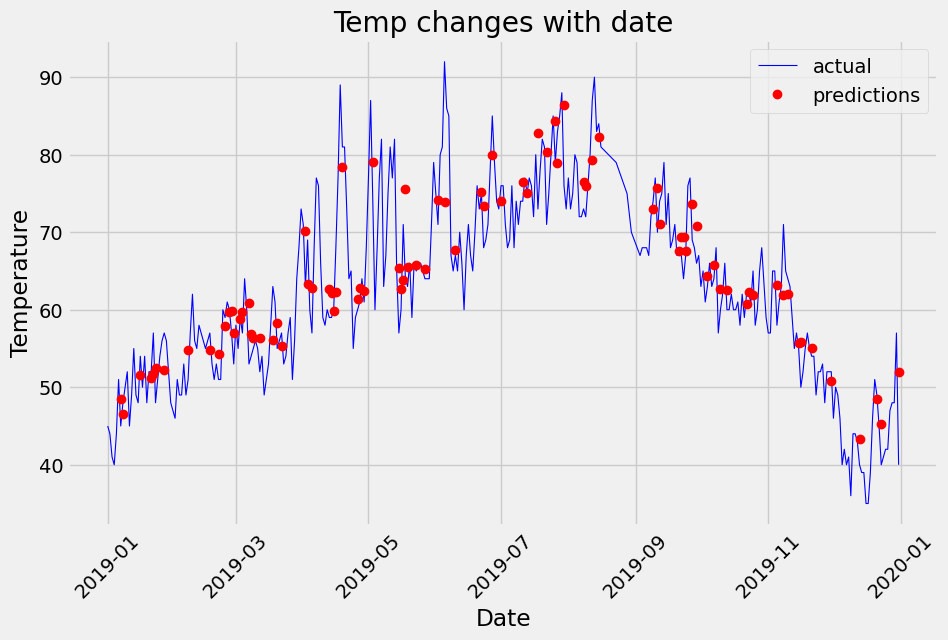

In [48]:
#绘制条形图

plt.figure(figsize = (10,6))
plt.plot(true_data['date'],true_data['actual'],'b-',linewidth = 0.8,label = 'actual')
plt.plot(test_temp['test_date'],test_temp['pred_temp'],'ro',label = 'predictions')
plt.legend(loc = 'best')

plt.xticks(rotation = 45)
plt.xlabel('Date');plt.ylabel('Temperature');plt.title('Temp changes with date')

从上图可以看出，模型预测的温度与真实数据基本上接近。

### 关键问题

样本数的增加，会对模型效果产生什么影响？
特征数量的增加，会对模型效果产生什么影响？
对模型的运算效率会有何影响？

## 数据与特征对结果影响分析